*Introduction*

In the landscape of customer churn analysis, the primary focus lies in understanding and predicting customer behavior with the aim of mitigating churn rates. By employing machine learning techniques, businesses can delve into historical customer data to identify patterns and factors that contribute to customer attrition. The dataset typically encompasses various customer attributes such as demographics, purchasing history, engagement metrics, and possibly external factors. Through this analysis, organizations can develop predictive models to forecast which customers are at risk of churning, allowing for proactive retention strategies to be implemented.


*Objective:*

The objective of customer churn analysis in machine learning is to develop predictive models that can accurately forecast which customers are likely to churn or discontinue their relationship with a business. By leveraging historical customer data, the goal is to identify patterns, trends, and factors that contribute to churn behavior. With these insights, organizations can proactively intervene and implement targeted retention strategies to retain customers and maximize customer lifetime value. Ultimately, the aim is to reduce churn rates, enhance customer satisfaction, and drive sustainable business growth.


### Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler




In [2]:
# read dataset
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
# first five row of the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### __The statistical summary of the dataset__

In [4]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# checking datatypes and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Dropping Irrelevant Feature
`RowNumber`, `CustomerId` and `Surname` are irrelivant, so we drop those features.

In [6]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

## Data Visualization 

<Axes: xlabel='IsActiveMember', ylabel='count'>

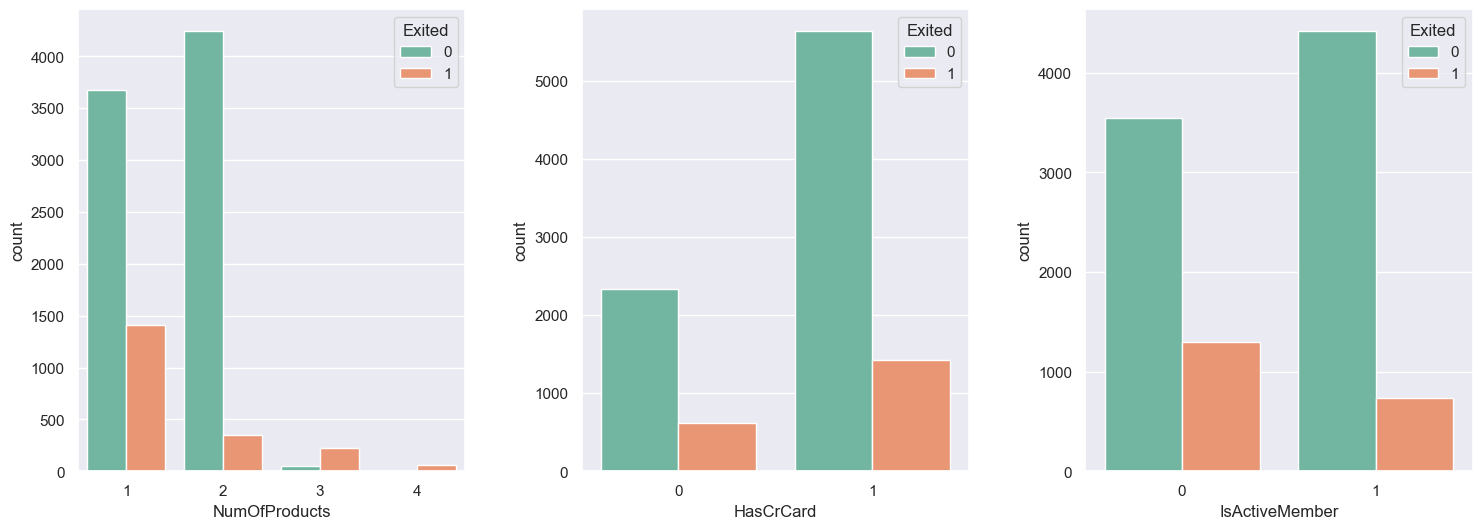

In [7]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = dataset, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = dataset, ax = ax[2])

__Customer with 3 or 4 products are higher chances to Churn__

In [8]:
encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

<Axes: xlabel='Age'>

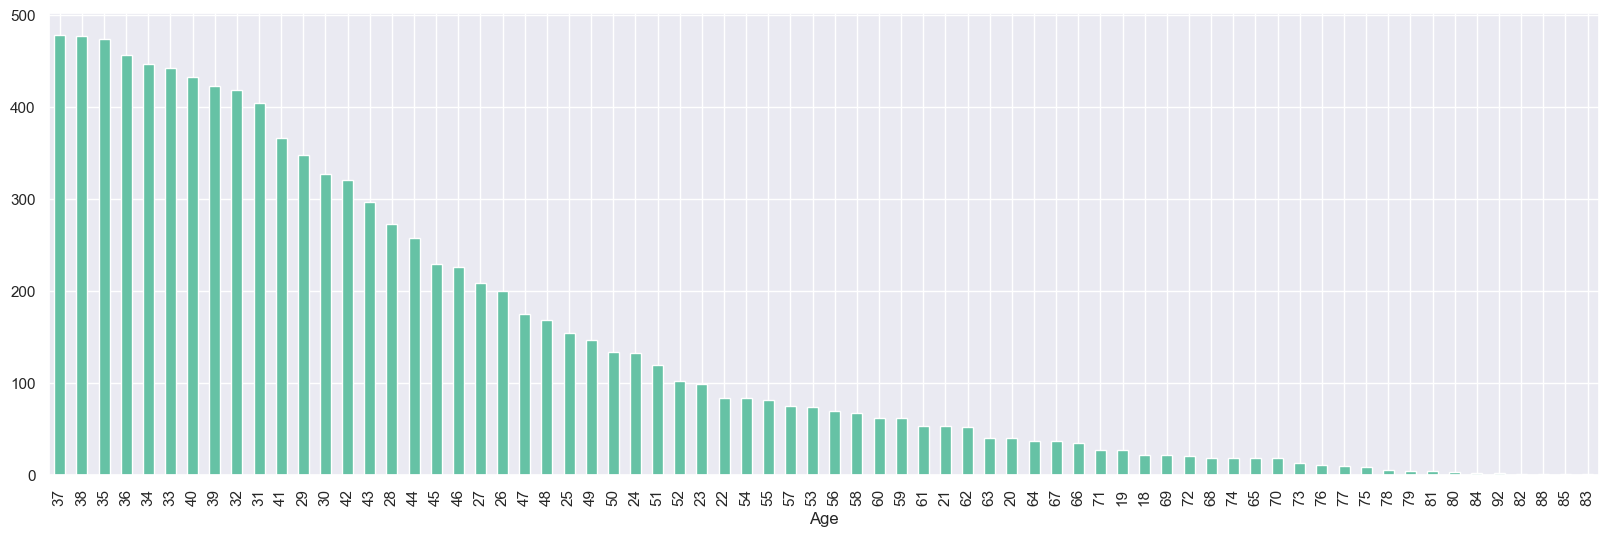

In [9]:
dataset["Age"].value_counts().plot.bar(figsize=(20,6))

/opt/homebrew/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


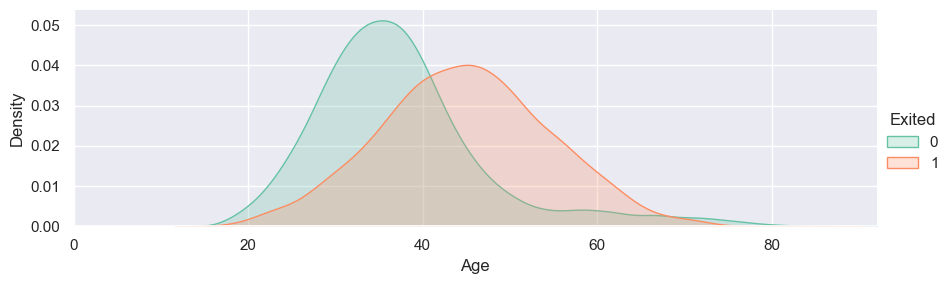

In [10]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()

plt.show()

> * __40 to 70 years old customers are higher chances to churn__
* __Customer with `CreditScore` less then `400` are higher chances to churn__

/opt/homebrew/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


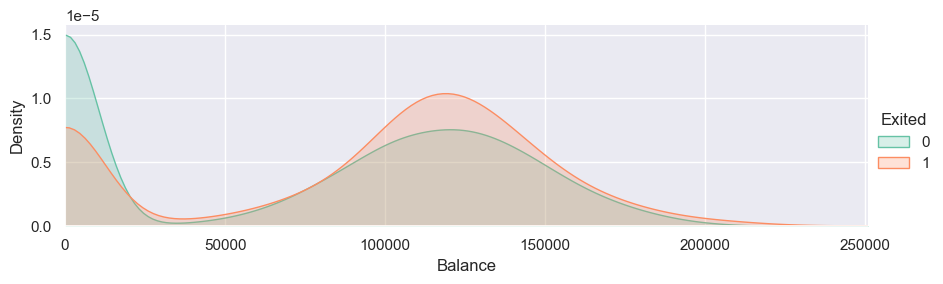

In [11]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, dataset["Balance"].max()))
facet.add_legend()

plt.show()

<Axes: xlabel='Balance', ylabel='CreditScore'>

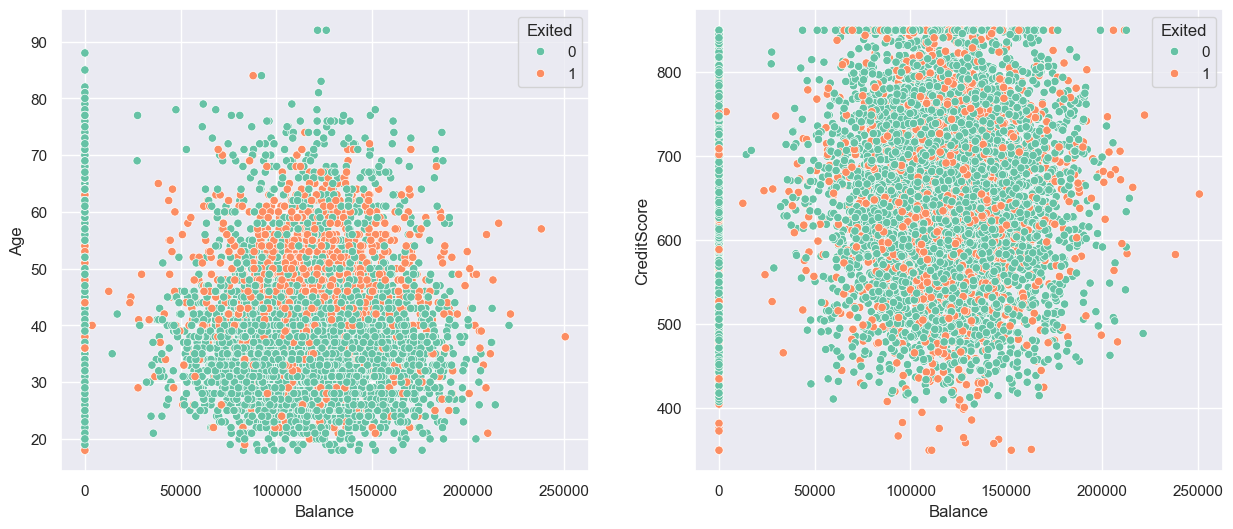

In [12]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = dataset, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = dataset, hue="Exited", ax = ax[1])

/opt/homebrew/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


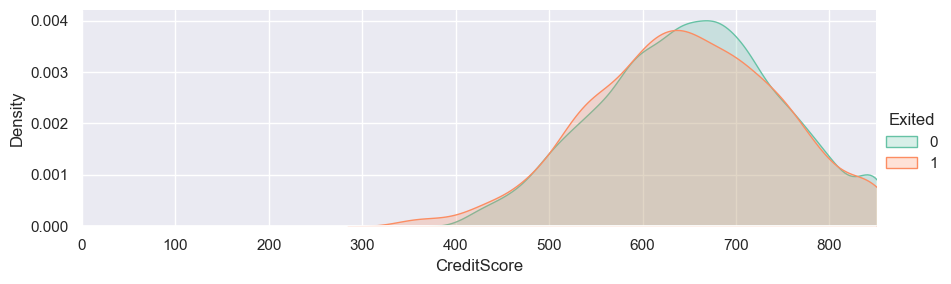

In [13]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, dataset["CreditScore"].max()))
facet.add_legend()

plt.show()

### __Detecting Outliers using Tukey Boxplot__

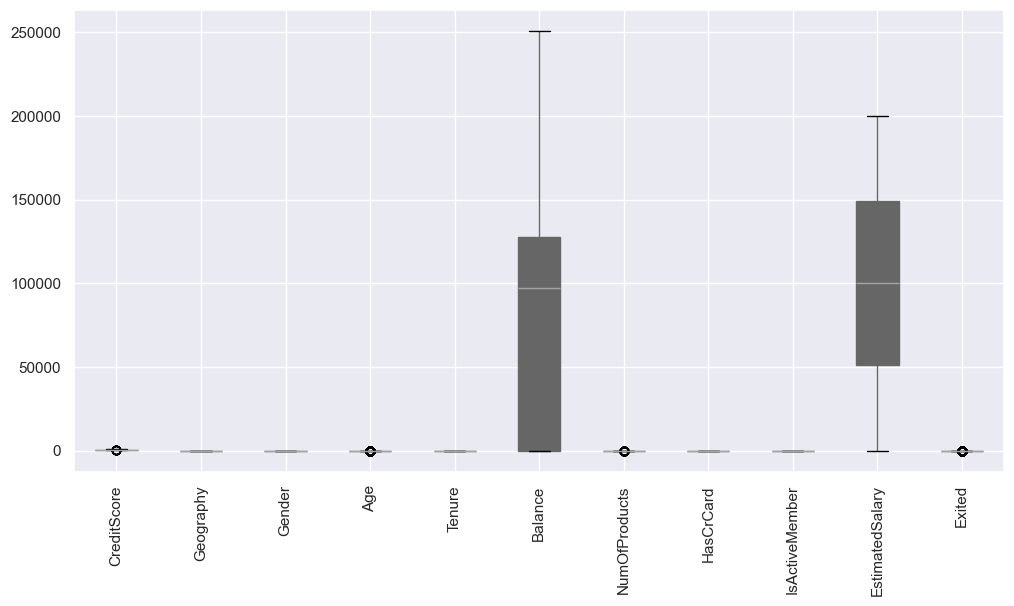

In [14]:
plt.figure(figsize=(12,6))
bplot = dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

### __Checking Correlation__

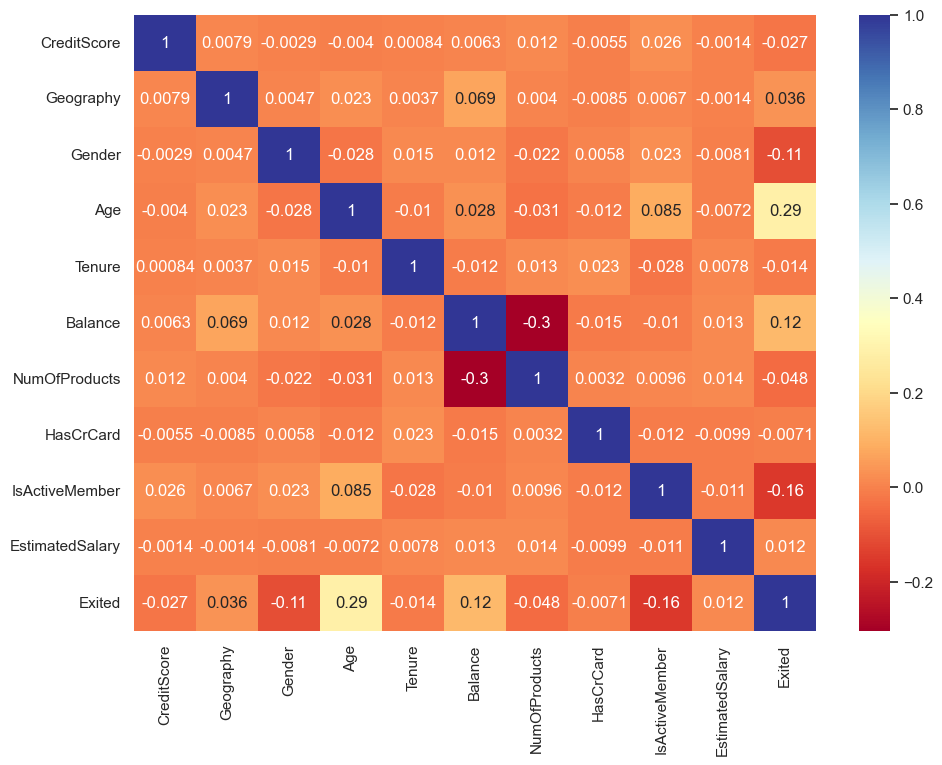

In [15]:
plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlBu")
plt.show()

## Prediction with ML models:

In [16]:
X = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

/opt/homebrew/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.786

*conclusion*

customer churn analysis utilizing machine learning techniques presents a powerful tool for businesses to better understand and anticipate customer behavior. By delving into historical data and developing predictive models, organizations can identify at-risk customers and implement proactive retention strategies. This not only helps in reducing churn rates but also fosters stronger customer relationships, enhances customer satisfaction, and ultimately contributes to long-term business success. Moving forward, continued refinement and application of machine learning algorithms in churn analysis will be instrumental in staying ahead in today's competitive market landscape.